## **Librerias**

In [3]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.metrics import Precision,Recall,Accuracy
from sklearn.metrics import precision_score,recall_score,accuracy_score

GPU TEST 🧪🧪

In [4]:
gpus = tf.config.experimental.list_physical_devices("GPU") #Se usa para evitar error por falta de memoria
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## **Creacion Data Set 💾**

In [5]:
Data_dir = './Data'
Data_train = './Data/train'
img_ext = ['png']

In [6]:
sub_carpetas = os.listdir(os.path.join(Data_dir,'train')) 
sub_carpetas

['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST']

In [7]:
os.listdir(Data_train)

['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST']

In [8]:
for img_class in os.listdir(Data_train):
    for image in os.listdir(os.path.join(Data_train,img_class)):
        image_path = os.path.join(Data_train,img_class,image)
        try:
            img = cv2.imread(image_path)   
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print('Formato no permitido'.format(image_path))
                os.remove(image_path)
        except Exception as e:  
            print("PRoblema con la imagen".format(image_path))

In [9]:
# for img_class in os.listdir(Data_train):
#     for image in os.listdir(os.path.join(Data_train,img_class)):
#         print(image)

In [10]:
data = tf.keras.utils.image_dataset_from_directory('./Data/train',image_size=(128,128),batch_size=128)


Found 840 files belonging to 7 classes.


In [11]:
data_iterador = data.as_numpy_iterator()
data_iterador

In [12]:
batch = data_iterador.next()
# batch[0].shape
# Esta seccion me permite tener un batch de imagenes que pueden ser traidas a memorias 
# cuando se requiera usar un bath, en este caso hay un bath de 128 imagenes, represenatadas en un arreglo de numpy

In [13]:
labels_aux = {0: 'Elbow' ,
              1: 'Finger',
              2: 'Forearm',
              3: 'Hand',
              4: 'Humerus',
              5: 'Shoulder',
              6: 'Wirst'}

## **Procesar Data Set 🏭**

In [14]:
data = data.map(lambda x,y: (x/255,y))
data # Se hace un escalado de los datos

<MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
scaled_iterador = data.as_numpy_iterator()
print(f'Valor mininmo {scaled_iterador.next()[0].min()}')
print(f'Valor maximo {scaled_iterador.next()[0].max()}')

Valor mininmo 0.0
Valor maximo 1.0


In [16]:
batch = scaled_iterador.next()

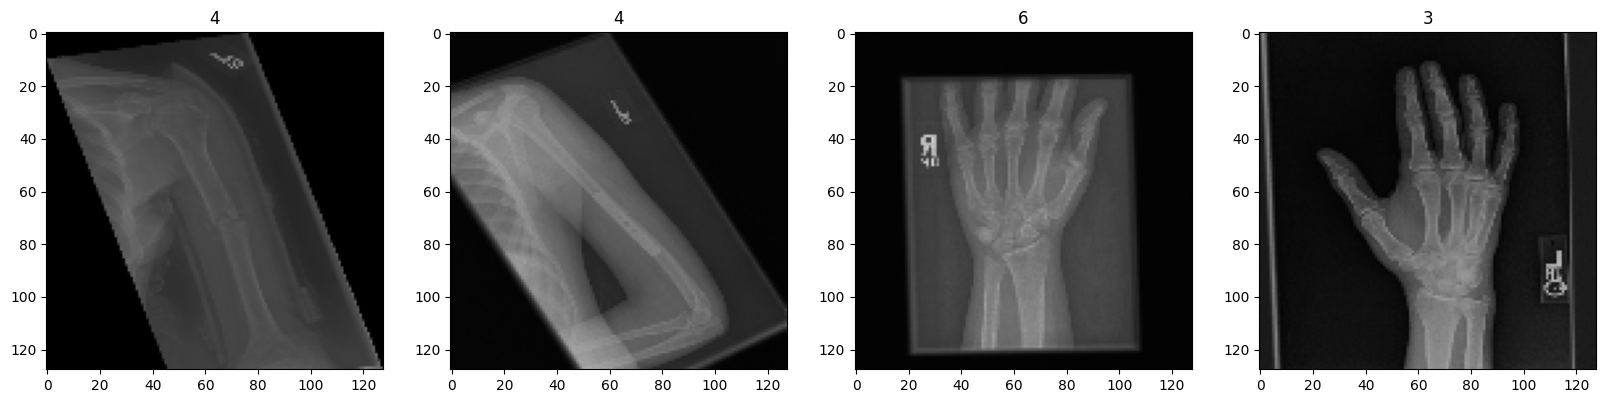

In [17]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### **SPLIT DATA 🪓**

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
print(f'train: {train_size}',f'test: {test_size}',f'val: {val_size}')
print(f'Leng Data: {len(data)}')

train: 4 test: 1 val: 2
Leng Data: 7


In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## **Modelo 📸**

### **Contruir Modelo 🔨**

In [20]:
model = Sequential()

model.add(Conv2D(32,(3,3),1, activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())    
model.add(Dense(128, activation='relu'))
model.add(Dense(7,activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

### **Entrenar Modelo 💪**

In [22]:
logdir = './logs'

In [23]:
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
4/4 [==============================] - 3s 120ms/step - loss: 1.9487 - accuracy: 0.1602 - val_loss: 1.9250 - val_accuracy: 0.2734
Epoch 2/20
4/4 [==============================] - 0s 95ms/step - loss: 1.9075 - accuracy: 0.2754 - val_loss: 1.8350 - val_accuracy: 0.3398
Epoch 3/20
4/4 [==============================] - 0s 102ms/step - loss: 1.7598 - accuracy: 0.3359 - val_loss: 1.6081 - val_accuracy: 0.4297
Epoch 4/20
4/4 [==============================] - 0s 93ms/step - loss: 1.5868 - accuracy: 0.4180 - val_loss: 1.5399 - val_accuracy: 0.4297
Epoch 5/20
4/4 [==============================] - 0s 101ms/step - loss: 1.3973 - accuracy: 0.4883 - val_loss: 1.3910 - val_accuracy: 0.4883
Epoch 6/20
4/4 [==============================] - 0s 95ms/step - loss: 1.3439 - accuracy: 0.5156 - val_loss: 1.2265 - val_accuracy: 0.5625
Epoch 7/20
4/4 [==============================] - 0s 104ms/step - loss: 1.2817 - accuracy: 0.5488 - val_loss: 1.1827 - val_accuracy: 0.5625
Epoch 8/20
4/4 [=======

### **Rendimiento ⚙️**

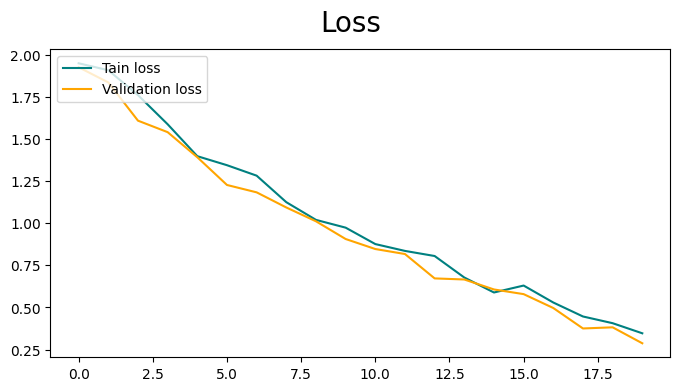

In [25]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'],color='teal',label='Tain loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

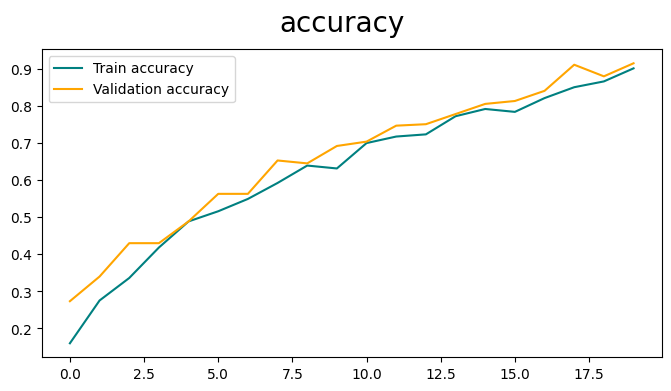

In [26]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'],color='teal',label='Train accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [47]:
# pre = Precision()
# re = Recall()
# acc = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    y =np.array(y) 

    yhat = (model.predict(X))    
    y_pred = []
    for i in range(len(yhat)):
        y_pred.append(np.argmax(yhat[i]))
    y_pred = np.array(y_pred) 

pre = precision_score(y, y_pred,average='macro')
re = recall_score(y, y_pred,average='macro')
acc = accuracy_score(y, y_pred)
precision = round(pre, 2)
recall = round(re, 2)
accuracy = round(acc, 2)

print(f"Resultados:\n Precision: {precision}\n ReCall: {recall}\n Exactitud: {accuracy}")

Resultados:
 Precision: 0.98
 ReCall: 0.99
 Exactitud: 0.99


In [42]:
precision = precision_score(y, y_pred,average='macro')
precision

0.9612244897959183

In [39]:
y

array([5, 1, 2, 6, 5, 5, 3, 1, 6, 0, 4, 4, 6, 6, 0, 4, 5, 6, 4, 2, 0, 3,
       6, 6, 2, 3, 0, 5, 3, 5, 5, 6, 2, 6, 0, 3, 4, 5, 5, 6, 4, 2, 0, 1,
       4, 1, 6, 3, 1, 1, 5, 5, 6, 4, 3, 6, 5, 1, 3, 5, 1, 3, 5, 4, 3, 1,
       4, 3, 1, 1, 0, 4])

## **Prediccion 🔮**

In [ ]:
def carga_imagen(img_test_path):    
    img = cv2.imread(img_test_path)
    resize = tf.image.resize(img, (128, 128))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    return resize

In [ ]:
def prediccion(imagen,model):   
    y_hat = model.predict(np.expand_dims(imagen/255,0))
    max_index = np.argmax(y_hat)
    max_index
    labels_aux = {0: 'Codo',
                  1: 'Dedo',
                  2: 'Antebrazo',
                  3: 'Mano',
                  4: 'Húmero',
                  5: 'Hombro',
                  6: 'Muñeca'}

    if max_index in labels_aux:
        prediccion_final = labels_aux[max_index]
    return print(f'La Radiografia corresponde a una fractura de {prediccion_final}')

In [ ]:
data_iterador_2 = test.as_numpy_iterator()
sc_2 = data_iterador_2.next()
type(sc_2[1])  

numpy.ndarray

In [ ]:
y_hat =  model.predict(sc_2[0])
y_pred = []
for i in range(len(y_hat)):
    # print(np.argmax(y_hat[i]))
    y_pred.append(np.argmax(y_hat[i]))
label = sc_2[1]
y_pred = np.array(y_pred)   


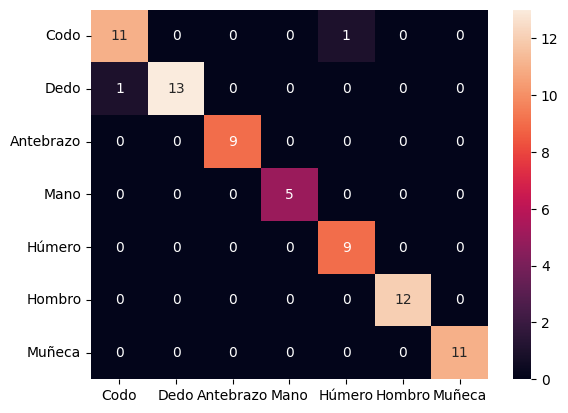

In [ ]:
# from sklearn.metrics import confusion_matrix
import pandas as pd
labels = ['Codo','Dedo','Antebrazo','Mano','Húmero','Hombro','Muñeca']
cm = tf.math.confusion_matrix(label, y_pred)
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d",xticklabels=labels, yticklabels=labels)

## **Cargar Modelo ☁️**

In [ ]:
model.save(os.path.join('modelos','Clasificador_Fracutra.h5'))

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('./modelos/Clasificador_Fracutra.h5')

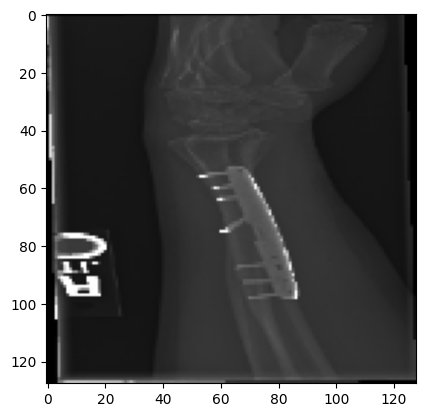

La Radiografia corresponde a una fractura de Muñeca


In [ ]:
img_test_path = './Imagenes_prueba/muneca.png'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)

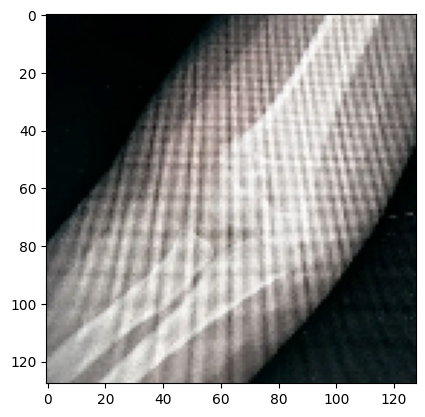

La Radiografia corresponde a una fractura de Codo


In [ ]:
img_test_path = './Imagenes_prueba/codo.webp'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)

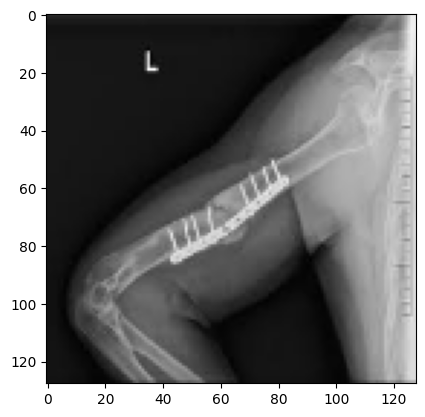

La Radiografia corresponde a una fractura de Húmero


In [ ]:
img_test_path = './Imagenes_prueba/humero.jpeg'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)

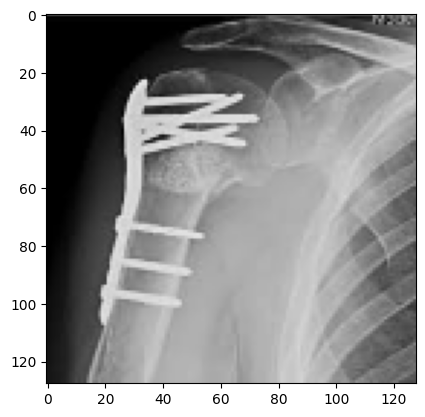

La Radiografia corresponde a una fractura de Hombro


In [ ]:
img_test_path = './Imagenes_prueba/hombro.jpeg'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)

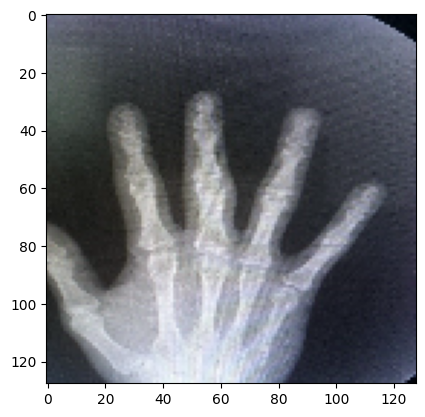

La Radiografia corresponde a una fractura de Mano


In [ ]:
img_test_path = './Imagenes_prueba/mano.jpg'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)

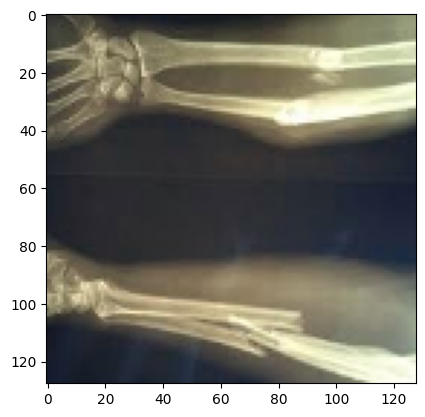

La Radiografia corresponde a una fractura de Antebrazo


In [ ]:
img_test_path = './Imagenes_prueba/Brazo.jpeg'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)

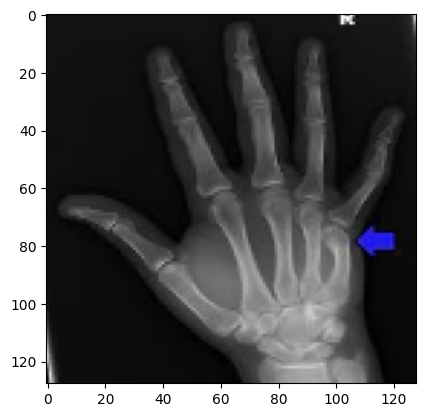

La Radiografia corresponde a una fractura de Dedo


In [ ]:
img_test_path = './Imagenes_prueba/dedo.jpeg'
imagen_2 = carga_imagen(img_test_path)
prediccion(imagen_2,new_model)